# Gelişmiş Ağaç Yöntemleri
## Rastgele Ormanlar ( Random Forests )

Temeli birden çok karar ağacın ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

CART aşırı öğrenmeye meyilli bir yöntem. Bu aşırı öğrenmeye olan meyili çözmek için  CART yönteminde dallanmayı belli bir noktada kesmek için bazı yaklasımlar geliştirilmiştir. Yani ağacı budama işlemleri gerçekleştirilmiştir. Bu yine iyi olsa da başka arayışlar geliştirilmiştir. Sonrasında Rastgele ortamlar ortaya cıkmıştır.

Temel çalışma prensibi, daha önce CART gördük. Bunun gibi 3 tane 5 tane ağaçç oldugunu düşünün. Herbir ağaca fikrinin soruldugunu ve her bir ağacın belirli bir sınıflandırma yada regresyon problemi için fikrini ifade ettiğini düşünün. Bu fikirlerin bir araya getirilerek nihai kaarara varıldıgını düşünün.  Birden fazla ağacın bir araya gelerek tahminler yaptıgı yöntemlerden birisidir.


- Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur. Artık biliyoruz ki birden fazla ağaç var. 500 tane var , bu 500 tane ağacın fikri sorulacak bir tahmin işinde. Peki bu 500 tane ağac nasıl oluşturulur. 

- Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi, ile **değişkenler random subspace yöntemi ile seçilir**

- Ağaçlar örneğin 500 tane ağaç varsa bunlar veri setinin içerisine yerine koymalı yani bootstrap örnekleme yöntemi ile tekrar tekrar örneklem seçilerek ağaçlar oluşturulur. Ve bu ağaçların üzerinde modeller kurulur. 

- Değişkenlerin seçiminde ise her bir ağaç içerisinde rastgele alt bir küme seçimi üzerinden değişkenler göz önünde bulundurulur.

- Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

- Random forest dediğimizde rastgeleliliğini nerden alıyor dediğimizde 2 şey aklımıza gelecek.

  1 - Gözlem birimlerinden rastgele seçerek, n tane örneğin ağaç oluşturur.
  2 - Oluşturdugu ağaclarda bölme işlemlerine başlayacak ya  , bu bölme işlemine başlamadan önce değişkenlerin içerisinden rastgele değişkenler seçer, daha az sayıda. Örneğin 100 tane değişken var bunun içerisinden 20 tane değişkeni rastgele seçer, bu seçmiş oldugu 20 tane değişkene bakıp bunlara göre dallanma işlemlerine karar verir.
  
  Bu şekilde aslında, değişken seçimi ve gözlem seçimi ile rassallığı korumus olur.
  Genellenebilirliği korumaya çalışır. İsmini buradan almaktadır. 
  
- Ağaç oluşturmada veri setinin 2/3 ' ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

Yani Breiman rastgele ormanlar yöntemi içerisinde henüz model validation gibi kavramlar söz konusu olmadan önce de ağaçları fit etmede train etmede 2/3 ünü, test etmede ise veri setinin 1/3 ünü kullanır.

- Her düğüm noktasında rastgele değişken seçimi yapılır.(regresyon'da p/3, sınıflamada karekök p) Fakat biz  bunu hyperparametre optimizasyonu kapsamında her düğüm noktasında kaç tane değişkeni göz önünde bulundurması gerektiği görevini hyperparameter optimizasyonu ile belirlemiş olacağız.

**Bagging yöntemi** : Tek basına olan bir CART algoritmasını aslında  çoğaltarak Bagging yöntemi ortaya çıkmıştır.


CART iyi demiştik neden yeni yöntemler ortaya cıkmış ki ? CART evet çok başarılı ama aşırı öğrenmeye meyilli . Öyle bir işlem yapılmalı ki rastgelelik korunuyor olmalı,  Öyle bir işlem yapılmalı ki tahmin başarısı rastgeleliği koruyarak arttırılıyor olmalı. Bu arayışların sonucunda önce Bagging ortaya cıkıyor. Ardından Bagging ile random sybspace 'i birleştirerek gözlem ve değişken seçiminde rastgeleleliği getirererek  random forest ortaya cıkıyor.

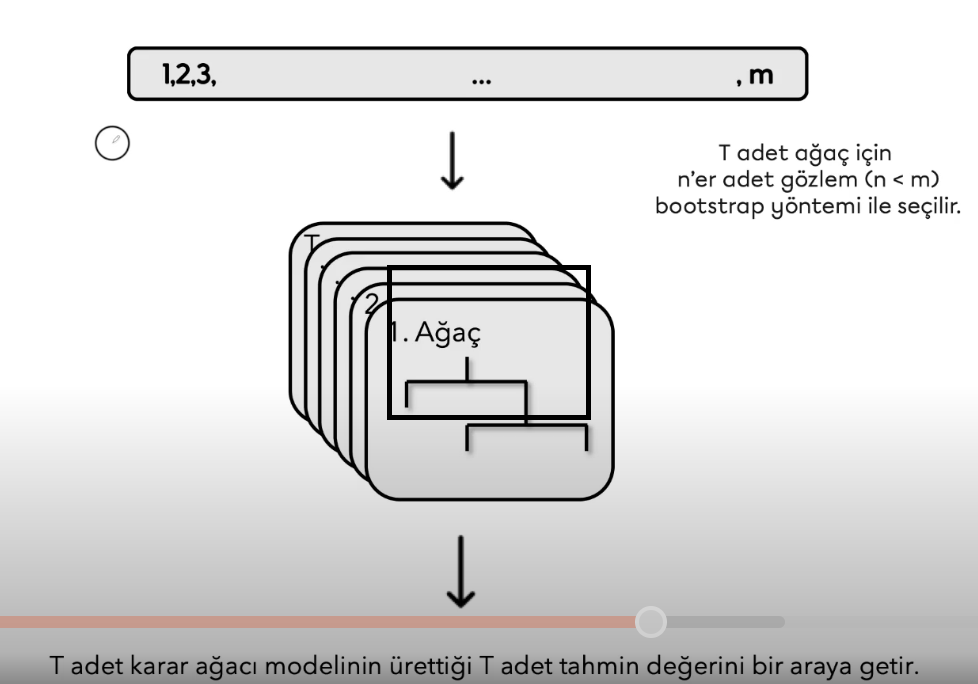


Bagging yöntemi yani topluluk öğrenme yöntemleri birbirinden bağımsız bir çok ağaç fit etme yaklaşımın ağaç yöntemlerinde dönüm noktadır. Ağaç yöntemlerinin literatürde bagging yöntemleri ve bootstrap yöntemleri olarak 2 'ye ayrıldıgı görülür. Bagging yöntemi demek aslında herhangi bir tekli ağaçı bootstrap örnekleme yöntemi ile tekrar tekrar oluşturarak rastgelelelik kazandırarak tahminlerde bulunmak demek. Bagging aslında bir metodolojidir.


Nasıl çalışıyor bagging yöntemi ?


    Diyelim ki elimizde m adet gözlem birimi var. Bu m adet gözlem birimi içerisinden n'er adet ve m'den daha kücük sayıda  bootstrap örnekleme yöntemi ile ağaçlar oluşturulur.  Diyelim ki verisetimizde 1000 tane gözlem var bu veri seti içerisinden rastgele 750 tane gözlem seçilir yani 750 tane satır seçilir. Seçtik diyelim bununla bir tane ağaç modeli kurulur. Sonra bu 750 tane gözlem birimi varya bu yerine konmuş gibi düşünülür , ve buradan yeni bir tane 750 seçilir. Bu yeniden seçilen 750 tane ile başka bir model kurulur. Bu şekilde yerine koymalı sekile gözlem sayısından daha az sayıda  gözlem ile yeni ağaçlar fit edilir yani modeller kurulur. Burada kurulmus olan T adet karar ağacı modelinin ürettiği T adet tahmin değeri bir araya getirilerek değerlendirilir. Bu bagging yöntemidir. Random forest'ın temelini oluşturulur. 
    
    **Bagging yönteminin kilit noktası bootstrap rastgele örneklem yöntemidir. Burada oluşturulan ağaçların önceki ağaçlar ile bağımlılıgı yoktur. Ağaçlar birbirinden bağımsızdır. 
    
    Bagging ile boosting yöntemlerinin farkı nedir ?? Bagging yöntemlerinde ağaçların birbirine bağımlılıgı yoktur. Boosting yöntemlerinde ise ağaçlar artıklar üzerine kurulur. Dolayısıyla ağaçların birbirine bağımlılıkları vardır.
    
    Bagging yöntemi ezberlemeye karşı dayanıklı yöntemdir.
    
    Random subspace nedir ?? diyelim ki veri setinde p adet değişken var.  Veri setinde diyelim 100 tane değişken var , 20 tane rastgele değişken seçiyorum bunun içerisinden . Ağaç dallanmaya hazır oldugunda  hani benim değişkenlerim nerde ? Gözlem birimleri geldi dallanmaya başlayacağım artık dediğinde değişken olarak o 20 taneyi veriyoruz. Dolayısıyla bu 20 ye bakılarak ağaç modeli kurulmaya başlıyor. İkinci ağaç için de diğer iterasyonlar için de böyle.  Veri seti içerisinden rastgele 20 tane başka bir örneklem seçilip ikinci ağaç içi dallanma işlemleri gündeme geliyor. 


# Gradient Boosting Machines ( GBM )

GBM; artık optimizasyonuna dayalı çalışan bir ağaç yöntemidir. Ağaç yöntemlerine  boosting yöntemi ve gradient descent'in uygulanmasıdır.

**AdaBoost (Adaptive Boosting)** yöntemi GBM 'in temelleridir. Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrine dayanır.

Tıpki bagging yöntemi gibi belirli bir mihent taşıdır. Önemli bir dönüm noktasıdır. Piyasada en fazla başarıya ulasan yöntemlerde boosting yöntemleridir.

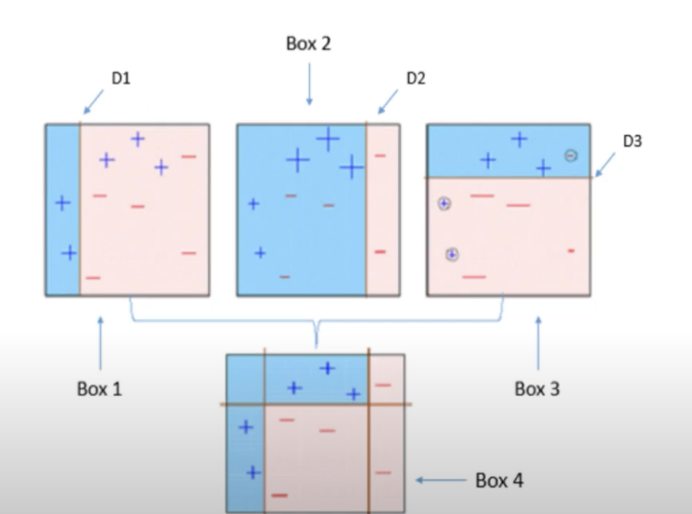

Şimdi amacımız, pozitif ve negatif sınıfları sınıflandırmak. Buradaki negatifler bir sınıfı, pozitifler başka bir sınıfı ifade ediyor. Diyelim ki bi sınıflandırma yapıldı. Sağ taraf kırmızı, sol taraf mavi . Mavinin içinde olan maviler doğru sınıflandırılmıs gözlem birimleri. Kırmızının içinde olan kırmızılar da doğru sınıflandırılmıs gözlem birimleri. Fakat burada yanlış sınıflandırılan  bazı değerler var.  

İkinci kutuya bakalım. Bu yanlış sınıflandırılanlara bir ağırlık verilerek tekrar bir sınıflandırma  yapıldıgında kırmızı bölgede olan kırmızılar doğru, mavi bölgede olan maviler doğru fakat yine yanlış sınıflandırılanlar var.

Üçüncü kutuya bakalım. Yanlış sınıflandırılan noktalara ağırlık verildiğinde bu sefer de yine 2 tane yanlıs sınıflandırılan var ama bir öncekine göre daha az sayıda yanlıs sınıflandırılan var. Ama bunlar bunlar artık 2 farklı  ağırlığı olan sınıflandırıcıdan geldikten sonra belirli bölgelerdeki daha az sayıda daha az sınıflandırılan var . 

Bir sonrakı basamağa geçince , (box4) üç tane sınıflandırıcı bir araya getirilmiş aslında. Yanlıs sınıflandırılan gözlemlerin doğru  sınıflandırılmaya çalışılması çabası ile ayrım noktaları hassaslaştırılmış.


AdaBoost (Adaptive Boosting) çalışma prensibi bu şekilde. Gelelim Gradient Boosting Machines 'e .

**GBM** nedir?? Hatalar / artıklar üzerine **tek bir tahminsel model formunda olan modeller serisi kurulur.**

Gradient descent'in boosting yöntemine uyarlandıgı haldir GBM yöntemi. Burada ağaçlar birbirine bağımlıdır. 



GBM = Boosting + Gradient Descent 

Zayıf öğrenicileri bir araya getirerek güçlü bir  öğrenici oluşturabilir miyim ? Ağaçlar tahminde bulunduktan sonra onların hatalarına odaklanarak bu hataların üzerine giderek boost edebilir miyim bu ağaçları ? bunu progmatik olarak nasıl yapabilirim?  Gradient descent ile yapabiliriz

- Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur.

- GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.

- Tek bir tahminsel model formunda olan modeller serisi **additive** şekilde kurulur.
    

### Additive Modelleme ? 
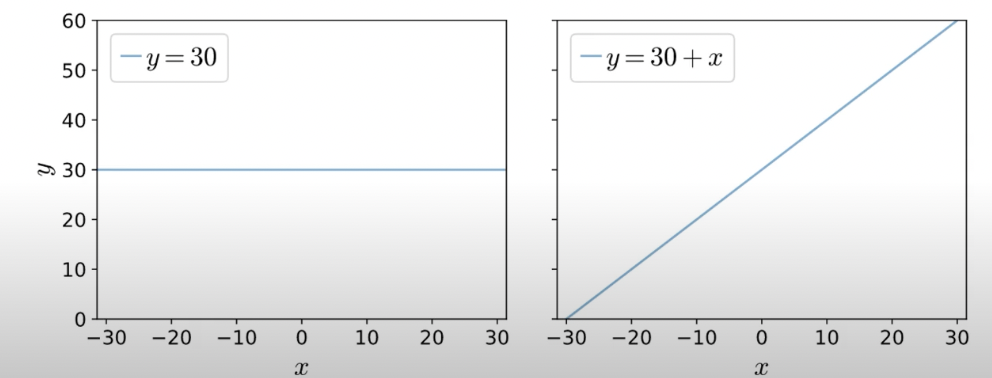
Sol taraftaki grafiğe odaklanalım. Burada sabit bir fonksiyon var. Yani y=30 yani x e bağlı değil, x e ne girerseniz girin sonucu değiştiremiyorsunuz sabit 30. Eğer bu sabit fonksiyonu x e bağlı değiştirmek isterseniz napabiliriz ? y = 30 + x diyebiliriz. Böylece x e bir değer girdiğimde üstüne 30 eklenecek dolayısıyla y değeri gelecek. Şimdi bir ekleme yaptık. X 'i ekledik. Sabit olan bir fonksiyonu biçimlendirdik. Bu fonksiyonu biraz daha detaylandırmak istersek napabiliriz? Buna biraz daha ekleme yaptırmak istiyorum. 

Amacım x in etkisini daha da detaylandırmak. Mesela şunu yapabiliriz. Kareli terimler ekleyebiliriz. X'in karesini,küpünü vs  alırız. Yada sinüs cosinüs gibi değerler ekleyebiliriz.  Özetle x' e bağlı teirme ekleyebiliriz.  Gözlemleneceği üzerine fonksiyon daha da hassaslaşır. Aşağıda görüldüğü gibi.

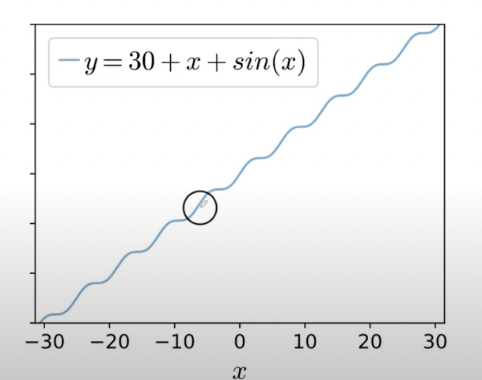


Konumuzla ne ilgisi var ? GBM konusunun temeli Additive modellemedir. 

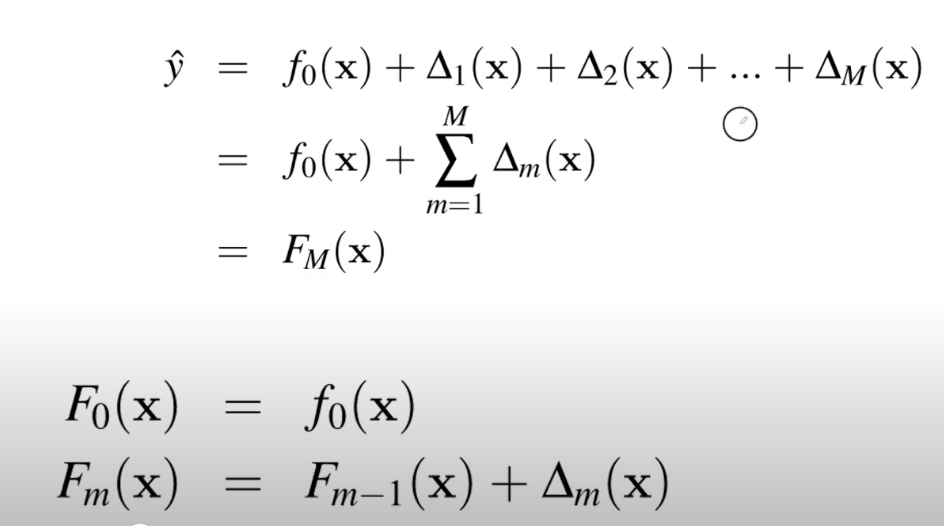




# XGBoost ( eXtreme Gradient Boosting )

     XGBoost, GBM 'in hız ve tahmin performansını arttırmak üzere optimize edilmiş,ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur.
     
# LightGBM

XGBoost'tan sonra literatüre giren ve başarısını kanıtlamış en önemli yöntemlerden birisidir. 

LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

Level - wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi ile daha hızlıdır. 


LightGBM başarılı olmasının sebebi , split etme yani dallara ayırma bölme büyüme  yöntemindeki farklılıktır. XGBoost değişkenleri bölme işlemi söz konusu oldugunda Level - wise  yani seviyeye göre bölme yöntemi izlerken, LightGBM bölme noktalarına odaklanıyor.Yapraklara odaklanıyor. 


Ağaç yapılarındaki bölme işlemleri düşünüldüğünde XGBoost geniş kapsamlı ilk arama yaparken, LightGBM derinlemesine ilk arama yapmaktadır.

# CatBoost(Categoric Boosting)

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı başarılı bir diğer GBM türevidir.

Hızlıdır.

CatBoost algoritması kendi içerisinde label-encoder’dan geçirilmemiş* data üzerinde kendi yöntemleriyle ilgilenen, Leaf-growth yani yaprak üzerinde büyüme gerçekleştiren, eksik değerler çalışabilen Yandex tarafından geliştirilmiş bir ağaç temelli algoritmadır. Aslında bu noktaya kadar saydığımız bütün algoritmalar, bir öncekinin üstüne koyarak ortaya çıkmaktadır. CatBoost bir Gradient Boosting Decision Tree (GBDT) algoritması olarak geçmektedir. 


# RandomSearchCV

 Hyperparameter Optimizasyonu için RandomSearchCV yöntemini öğrenelim. GridSearchCV 'de verilen bir setin olası bütün kombinasyonlarını deniyorduk .  RandomsearchCV ise verilecek bir hiperparametre seti içerisinden rastgele seçimler yapar ve bu rastgele seçimleri arar.
 
 
 GridSearchCV bütün olası kombinasyonları denediği için daha uzun sürer. 